# Fitur Kata Kunci

## **Menampilkan data**

In [ ]:
import requests
import csv
import pandas as pd
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import networkx as nx


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataf = pd.read_csv('/content/drive/MyDrive/ppw/CosinusSimiliarity/databeritasatu.com/databeritasatu.csv')
dataf

,Kategori,Judul,Tanggal,Link,Konten
0,Pemilu,"Gelar Dialog Kebangsaan, Kapolda Maluku Harap ...",5 jam yang lalu,https://www.beritasatu.com/nusantara/2780002/g...,"Ambon, Beritasatu.com - Polda Maluku menggelar..."
1,Pemilu,Puluhan APK Caleg di Kota Semarang Ditertibkan...,5 jam yang lalu,https://www.beritasatu.com/nusantara/2779999/p...,"Semarang, Beritasatu.com - Sekitar 60 alat per..."
2,Pemilu,"Langgar Aturan, Bawaslu Polman Tertibkan Ratus...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779992/l...,"Polewali Mandar, Beritasatu.com - Badan Pengaw..."
3,Pemilu,"Deklarasi Pemilu Damai 2024, TNI dan Polri Tub...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779983/d...,"Tuban, Beritasatu.com – Komandan Kodim (Dandim..."
4,Pemilu,"Respons Putusan MKMK, Anwar Usman: Ada Skenari...",10 jam yang lalu,https://www.beritasatu.com/nasional/2779964/re...,"Jakarta, Beritasatu.com - Hakim Mahkamah Konst..."
...,...,...,...,...,...
1232,Techno,Inilah Daftar Lengkap Pemenang AMI Awards 2012,5 Jul 2012 | 09:47 WIB,https://www.beritasatu.com/news/58200/inilah-d...,Agnes dan Afgan berbagi penghargaanrrAjang pen...
1233,Techno,Oka Sulaksana Tampil di ABG,7 Jun 2012 | 16:25 WIB,https://www.beritasatu.com/news/52678/oka-sula...,"Oka nantinya akan turun di kelas ""techno"" putr..."
1234,Techno,"Saat Pemakai Terangsang, Gaun ini Jadi Trasparan",5 Apr 2012 | 15:42 WIB,https://www.beritasatu.com/news/41000/saat-pem...,"Gaun ini segera dipasarkan.rrIntimacy 2.0, ada..."
1235,Techno,Situs Mobil Esemka Palsu Beredar,24 Feb 2012 | 13:43 WIB,https://www.beritasatu.com/ekonomi/33442/situs...,Pelaku membuat website palsu http://www.mobile...


### Cek data duplikasi

In [ ]:
dataf.drop_duplicates()


,Kategori,Judul,Tanggal,Link,Konten
0,Pemilu,"Gelar Dialog Kebangsaan, Kapolda Maluku Harap ...",5 jam yang lalu,https://www.beritasatu.com/nusantara/2780002/g...,"Ambon, Beritasatu.com - Polda Maluku menggelar..."
1,Pemilu,Puluhan APK Caleg di Kota Semarang Ditertibkan...,5 jam yang lalu,https://www.beritasatu.com/nusantara/2779999/p...,"Semarang, Beritasatu.com - Sekitar 60 alat per..."
2,Pemilu,"Langgar Aturan, Bawaslu Polman Tertibkan Ratus...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779992/l...,"Polewali Mandar, Beritasatu.com - Badan Pengaw..."
3,Pemilu,"Deklarasi Pemilu Damai 2024, TNI dan Polri Tub...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779983/d...,"Tuban, Beritasatu.com – Komandan Kodim (Dandim..."
4,Pemilu,"Respons Putusan MKMK, Anwar Usman: Ada Skenari...",10 jam yang lalu,https://www.beritasatu.com/nasional/2779964/re...,"Jakarta, Beritasatu.com - Hakim Mahkamah Konst..."
...,...,...,...,...,...
1232,Techno,Inilah Daftar Lengkap Pemenang AMI Awards 2012,5 Jul 2012 | 09:47 WIB,https://www.beritasatu.com/news/58200/inilah-d...,Agnes dan Afgan berbagi penghargaanrrAjang pen...
1233,Techno,Oka Sulaksana Tampil di ABG,7 Jun 2012 | 16:25 WIB,https://www.beritasatu.com/news/52678/oka-sula...,"Oka nantinya akan turun di kelas ""techno"" putr..."
1234,Techno,"Saat Pemakai Terangsang, Gaun ini Jadi Trasparan",5 Apr 2012 | 15:42 WIB,https://www.beritasatu.com/news/41000/saat-pem...,"Gaun ini segera dipasarkan.rrIntimacy 2.0, ada..."
1235,Techno,Situs Mobil Esemka Palsu Beredar,24 Feb 2012 | 13:43 WIB,https://www.beritasatu.com/ekonomi/33442/situs...,Pelaku membuat website palsu http://www.mobile...


### Cek data null

In [ ]:
dataf.isnull().sum()

Kategori    0
Judul       0
Tanggal     0
Link        0
Konten      2
dtype: int64

### Hapus data null

In [ ]:
df = dataf.dropna()
df.isnull().sum()

Kategori    0
Judul       0
Tanggal     0
Link        0
Konten      0
dtype: int64

### Reset Index

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.shape

(1235, 5)

### Menghitung jumlah data perkategori

In [ ]:
df['Kategori'].value_counts()

Sport     500
Pemilu    498
Techno    237
Name: Kategori, dtype: int64

## Preprocessing

### Cleaning data

Lower Case

In [ ]:
df['Konten'] = df['Konten'].str.lower()
print(df['Konten'])

0       ambon, beritasatu.com - polda maluku menggelar...
1       semarang, beritasatu.com - sekitar 60 alat per...
2       polewali mandar, beritasatu.com - badan pengaw...
3       tuban, beritasatu.com – komandan kodim (dandim...
4       jakarta, beritasatu.com - hakim mahkamah konst...
                              ...                        
1230    agnes dan afgan berbagi penghargaanrrajang pen...
1231    oka nantinya akan turun di kelas "techno" putr...
1232    gaun ini segera dipasarkan.rrintimacy 2.0, ada...
1233    pelaku membuat website palsu http://www.mobile...
1234    mobil esemka ini berangkat dari solo melewati ...
Name: Konten, Length: 1235, dtype: object


Menghapus kata

In [ ]:
# Daftar kata yang ingin dihilangkan
kata_hapus = ['advertisement', 'beritasatu.com','\n', 'dan','ini','itu','adalah','di','yang']


# Melakukan pengolahan pada setiap baris di kolom 'Konten'
for kata in kata_hapus:
    df['Konten'] = df['Konten'].str.replace(kata, '')

# Menampilkan DataFrame setelah pengolahan
print(df['Konten'])

0       ambon,  - polda maluku menggelar alog kebangsa...
1       semarang,  - sekitar 60 alat peraga kampanye (...
2       polewali mandar,  - ba pengawas pemilu (bawasl...
3       tuban,  – koman kom (m) 0811/tuban, bersama ka...
4       jakarta,  - hakim mahkamah konstsi (mk) anwar ...
                              ...                        
1230    agnes  afgan berbagi penghargaanrrajang pengha...
1231    oka nantinya akan turun  kelas "techno" putra,...
1232    gaun  segera pasarkan.rrintimacy 2.0,  nama ga...
1233    pelaku membuat website palsu http://www.mobile...
1234    mobil esemka  berangkat dari solo melewati rut...
Name: Konten, Length: 1235, dtype: object


<ipython-input-11-d7e48dc75e9f>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Konten'] = df['Konten'].str.replace(kata, '')


Hapus Karakter Khusus

In [ ]:
df['Konten'] = df['Konten'].str.replace('[^a-zA-Z\s]', '')
df['Konten']

<ipython-input-12-61b793d67b04>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Konten'] = df['Konten'].str.replace('[^a-zA-Z\s]', '')


0       ambon   polda maluku menggelar alog kebangsaan...
1       semarang   sekitar  alat peraga kampanye apk c...
2       polewali mandar   ba pengawas pemilu bawaslu k...
3       tuban   koman kom m tuban bersama kapolres tub...
4       jakarta   hakim mahkamah konstsi mk anwar usma...
                              ...                        
1230    agnes  afgan berbagi penghargaanrrajang pengha...
1231    oka nantinya akan turun  kelas techno putrar r...
1232    gaun  segera pasarkanrrintimacy   nama gaun te...
1233    pelaku membuat website palsu httpwwwmobilesemk...
1234    mobil esemka  berangkat dari solo melewati rut...
Name: Konten, Length: 1235, dtype: object

Hapus Angka

In [ ]:
df['Konten'] = df['Konten'].str.replace('\d+', '')
df['Konten']

<ipython-input-13-c8f8529757b7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Konten'] = df['Konten'].str.replace('\d+', '')


0       ambon   polda maluku menggelar alog kebangsaan...
1       semarang   sekitar  alat peraga kampanye apk c...
2       polewali mandar   ba pengawas pemilu bawaslu k...
3       tuban   koman kom m tuban bersama kapolres tub...
4       jakarta   hakim mahkamah konstsi mk anwar usma...
                              ...                        
1230    agnes  afgan berbagi penghargaanrrajang pengha...
1231    oka nantinya akan turun  kelas techno putrar r...
1232    gaun  segera pasarkanrrintimacy   nama gaun te...
1233    pelaku membuat website palsu httpwwwmobilesemk...
1234    mobil esemka  berangkat dari solo melewati rut...
Name: Konten, Length: 1235, dtype: object

In [ ]:
df.shape

(1235, 5)

In [ ]:
df['cleaning'] = df['Konten'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()
df

,Kategori,Judul,Tanggal,Link,Konten,cleaning
0,Pemilu,"Gelar Dialog Kebangsaan, Kapolda Maluku Harap ...",5 jam yang lalu,https://www.beritasatu.com/nusantara/2780002/g...,ambon polda maluku menggelar alog kebangsaan...,ambon polda maluku menggelar alog kebangsaan...
1,Pemilu,Puluhan APK Caleg di Kota Semarang Ditertibkan...,5 jam yang lalu,https://www.beritasatu.com/nusantara/2779999/p...,semarang sekitar alat peraga kampanye apk c...,semarang sekitar alat peraga kampanye apk c...
2,Pemilu,"Langgar Aturan, Bawaslu Polman Tertibkan Ratus...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779992/l...,polewali mandar ba pengawas pemilu bawaslu k...,polewali mandar ba pengawas pemilu bawaslu k...
3,Pemilu,"Deklarasi Pemilu Damai 2024, TNI dan Polri Tub...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779983/d...,tuban koman kom m tuban bersama kapolres tub...,tuban koman kom m tuban bersama kapolres tub...
4,Pemilu,"Respons Putusan MKMK, Anwar Usman: Ada Skenari...",10 jam yang lalu,https://www.beritasatu.com/nasional/2779964/re...,jakarta hakim mahkamah konstsi mk anwar usma...,jakarta hakim mahkamah konstsi mk anwar usma...
...,...,...,...,...,...,...
1230,Techno,Inilah Daftar Lengkap Pemenang AMI Awards 2012,5 Jul 2012 | 09:47 WIB,https://www.beritasatu.com/news/58200/inilah-d...,agnes afgan berbagi penghargaanrrajang pengha...,agnes afgan berbagi penghargaanrrajang pengha...
1231,Techno,Oka Sulaksana Tampil di ABG,7 Jun 2012 | 16:25 WIB,https://www.beritasatu.com/news/52678/oka-sula...,oka nantinya akan turun kelas techno putrar r...,oka nantinya akan turun kelas techno putrar r...
1232,Techno,"Saat Pemakai Terangsang, Gaun ini Jadi Trasparan",5 Apr 2012 | 15:42 WIB,https://www.beritasatu.com/news/41000/saat-pem...,gaun segera pasarkanrrintimacy nama gaun te...,gaun segera pasarkanrrintimacy nama gaun te...
1233,Techno,Situs Mobil Esemka Palsu Beredar,24 Feb 2012 | 13:43 WIB,https://www.beritasatu.com/ekonomi/33442/situs...,pelaku membuat website palsu httpwwwmobilesemk...,pelaku membuat website palsu httpwwwmobilesemk...


### Tokenisasi

In [ ]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Tokenisasi teks menjadi kalimat menggunakan nltk
df['tokenize'] = df['cleaning'].apply(lambda x: ' '.join(nltk.sent_tokenize(x)))
df

,Kategori,Judul,Tanggal,Link,Konten,cleaning,tokenize
0,Pemilu,"Gelar Dialog Kebangsaan, Kapolda Maluku Harap ...",5 jam yang lalu,https://www.beritasatu.com/nusantara/2780002/g...,ambon polda maluku menggelar alog kebangsaan...,ambon polda maluku menggelar alog kebangsaan...,ambon polda maluku menggelar alog kebangsaan...
1,Pemilu,Puluhan APK Caleg di Kota Semarang Ditertibkan...,5 jam yang lalu,https://www.beritasatu.com/nusantara/2779999/p...,semarang sekitar alat peraga kampanye apk c...,semarang sekitar alat peraga kampanye apk c...,semarang sekitar alat peraga kampanye apk c...
2,Pemilu,"Langgar Aturan, Bawaslu Polman Tertibkan Ratus...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779992/l...,polewali mandar ba pengawas pemilu bawaslu k...,polewali mandar ba pengawas pemilu bawaslu k...,polewali mandar ba pengawas pemilu bawaslu k...
3,Pemilu,"Deklarasi Pemilu Damai 2024, TNI dan Polri Tub...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779983/d...,tuban koman kom m tuban bersama kapolres tub...,tuban koman kom m tuban bersama kapolres tub...,tuban koman kom m tuban bersama kapolres tub...
4,Pemilu,"Respons Putusan MKMK, Anwar Usman: Ada Skenari...",10 jam yang lalu,https://www.beritasatu.com/nasional/2779964/re...,jakarta hakim mahkamah konstsi mk anwar usma...,jakarta hakim mahkamah konstsi mk anwar usma...,jakarta hakim mahkamah konstsi mk anwar usma...
...,...,...,...,...,...,...,...
1230,Techno,Inilah Daftar Lengkap Pemenang AMI Awards 2012,5 Jul 2012 | 09:47 WIB,https://www.beritasatu.com/news/58200/inilah-d...,agnes afgan berbagi penghargaanrrajang pengha...,agnes afgan berbagi penghargaanrrajang pengha...,agnes afgan berbagi penghargaanrrajang pengha...
1231,Techno,Oka Sulaksana Tampil di ABG,7 Jun 2012 | 16:25 WIB,https://www.beritasatu.com/news/52678/oka-sula...,oka nantinya akan turun kelas techno putrar r...,oka nantinya akan turun kelas techno putrar r...,oka nantinya akan turun kelas techno putrar r...
1232,Techno,"Saat Pemakai Terangsang, Gaun ini Jadi Trasparan",5 Apr 2012 | 15:42 WIB,https://www.beritasatu.com/news/41000/saat-pem...,gaun segera pasarkanrrintimacy nama gaun te...,gaun segera pasarkanrrintimacy nama gaun te...,gaun segera pasarkanrrintimacy nama gaun te...
1233,Techno,Situs Mobil Esemka Palsu Beredar,24 Feb 2012 | 13:43 WIB,https://www.beritasatu.com/ekonomi/33442/situs...,pelaku membuat website palsu httpwwwmobilesemk...,pelaku membuat website palsu httpwwwmobilesemk...,pelaku membuat website palsu httpwwwmobilesemk...


In [ ]:
df['tokenize'][0]

'ambon   polda maluku menggelar alog kebangsaan  berlangsung  gedung plasa presisi polda maluku pada rabu  sore acara alog kebangsaan bertujuan untuk mewujudkan pemilu damai tahun  sehingga dapat berjalan dengan lancar aman  damaisaya selaku kapolda maluku mengucapkan terima kasih  apresiasi kepada tni polri pemda kpu bawaslu okp tokoh agama tokoh masyarakat  insan pers atas sinergitas koornasi  komunikasi  terjalin selama  kata kapolda maluku irjen pol lotharia latif saat membuka alog kebangsaandalam alog kebangsaan kali  mengusung tema peran masyarakat dalam mewujudkan pemilu   aman  damai sebagai sarana integrasi bangsa  wilayah malukubaca jugadeklarasi pemilu damai  tni  polri tuban pastikan netral pelaksanaan pemilu  hanya tinggal menghng  hari lagi   merupakan pekerjaan besar  sangat menentukan masa depan bangsa  negara untuk  pada sore hari  kita melaksanakan alog kebangsaan dengan harapan pemilu   maluku dapat terlaksana dengan aman  damai katanyajelang pemilu polri dukung oleh

## Memecah Kalimat

In [ ]:
df['pecah'] = df['tokenize'].apply(lambda x: sent_tokenize(str(x)) if pd.notnull(x) else [])
df

,Kategori,Judul,Tanggal,Link,Konten,cleaning,tokenize,pecah
0,Pemilu,"Gelar Dialog Kebangsaan, Kapolda Maluku Harap ...",5 jam yang lalu,https://www.beritasatu.com/nusantara/2780002/g...,ambon polda maluku menggelar alog kebangsaan...,ambon polda maluku menggelar alog kebangsaan...,ambon polda maluku menggelar alog kebangsaan...,[ambon polda maluku menggelar alog kebangsaa...
1,Pemilu,Puluhan APK Caleg di Kota Semarang Ditertibkan...,5 jam yang lalu,https://www.beritasatu.com/nusantara/2779999/p...,semarang sekitar alat peraga kampanye apk c...,semarang sekitar alat peraga kampanye apk c...,semarang sekitar alat peraga kampanye apk c...,[semarang sekitar alat peraga kampanye apk ...
2,Pemilu,"Langgar Aturan, Bawaslu Polman Tertibkan Ratus...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779992/l...,polewali mandar ba pengawas pemilu bawaslu k...,polewali mandar ba pengawas pemilu bawaslu k...,polewali mandar ba pengawas pemilu bawaslu k...,[polewali mandar ba pengawas pemilu bawaslu ...
3,Pemilu,"Deklarasi Pemilu Damai 2024, TNI dan Polri Tub...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779983/d...,tuban koman kom m tuban bersama kapolres tub...,tuban koman kom m tuban bersama kapolres tub...,tuban koman kom m tuban bersama kapolres tub...,[tuban koman kom m tuban bersama kapolres tu...
4,Pemilu,"Respons Putusan MKMK, Anwar Usman: Ada Skenari...",10 jam yang lalu,https://www.beritasatu.com/nasional/2779964/re...,jakarta hakim mahkamah konstsi mk anwar usma...,jakarta hakim mahkamah konstsi mk anwar usma...,jakarta hakim mahkamah konstsi mk anwar usma...,[jakarta hakim mahkamah konstsi mk anwar usm...
...,...,...,...,...,...,...,...,...
1230,Techno,Inilah Daftar Lengkap Pemenang AMI Awards 2012,5 Jul 2012 | 09:47 WIB,https://www.beritasatu.com/news/58200/inilah-d...,agnes afgan berbagi penghargaanrrajang pengha...,agnes afgan berbagi penghargaanrrajang pengha...,agnes afgan berbagi penghargaanrrajang pengha...,[agnes afgan berbagi penghargaanrrajang pengh...
1231,Techno,Oka Sulaksana Tampil di ABG,7 Jun 2012 | 16:25 WIB,https://www.beritasatu.com/news/52678/oka-sula...,oka nantinya akan turun kelas techno putrar r...,oka nantinya akan turun kelas techno putrar r...,oka nantinya akan turun kelas techno putrar r...,[oka nantinya akan turun kelas techno putrar ...
1232,Techno,"Saat Pemakai Terangsang, Gaun ini Jadi Trasparan",5 Apr 2012 | 15:42 WIB,https://www.beritasatu.com/news/41000/saat-pem...,gaun segera pasarkanrrintimacy nama gaun te...,gaun segera pasarkanrrintimacy nama gaun te...,gaun segera pasarkanrrintimacy nama gaun te...,[gaun segera pasarkanrrintimacy nama gaun t...
1233,Techno,Situs Mobil Esemka Palsu Beredar,24 Feb 2012 | 13:43 WIB,https://www.beritasatu.com/ekonomi/33442/situs...,pelaku membuat website palsu httpwwwmobilesemk...,pelaku membuat website palsu httpwwwmobilesemk...,pelaku membuat website palsu httpwwwmobilesemk...,[pelaku membuat website palsu httpwwwmobilesem...


In [ ]:
df['pecah'][0]

['ambon   polda maluku menggelar alog kebangsaan  berlangsung  gedung plasa presisi polda maluku pada rabu  sore acara alog kebangsaan bertujuan untuk mewujudkan pemilu damai tahun  sehingga dapat berjalan dengan lancar aman  damaisaya selaku kapolda maluku mengucapkan terima kasih  apresiasi kepada tni polri pemda kpu bawaslu okp tokoh agama tokoh masyarakat  insan pers atas sinergitas koornasi  komunikasi  terjalin selama  kata kapolda maluku irjen pol lotharia latif saat membuka alog kebangsaandalam alog kebangsaan kali  mengusung tema peran masyarakat dalam mewujudkan pemilu   aman  damai sebagai sarana integrasi bangsa  wilayah malukubaca jugadeklarasi pemilu damai  tni  polri tuban pastikan netral pelaksanaan pemilu  hanya tinggal menghng  hari lagi   merupakan pekerjaan besar  sangat menentukan masa depan bangsa  negara untuk  pada sore hari  kita melaksanakan alog kebangsaan dengan harapan pemilu   maluku dapat terlaksana dengan aman  damai katanyajelang pemilu polri dukung ole

Memakai 1 berita

In [ ]:
# Mengambil berita dengan indeks tertentu
single_news_list = df['pecah'].iloc[0]
# Menggabungkan semua kalimat menjadi satu teks panjang
single_news = ' '.join(single_news_list)

# Memecah kalimat dari berita tunggal
sentences = sent_tokenize(single_news)
sentences

['ambon   polda maluku menggelar alog kebangsaan  berlangsung  gedung plasa presisi polda maluku pada rabu  sore acara alog kebangsaan bertujuan untuk mewujudkan pemilu damai tahun  sehingga dapat berjalan dengan lancar aman  damaisaya selaku kapolda maluku mengucapkan terima kasih  apresiasi kepada tni polri pemda kpu bawaslu okp tokoh agama tokoh masyarakat  insan pers atas sinergitas koornasi  komunikasi  terjalin selama  kata kapolda maluku irjen pol lotharia latif saat membuka alog kebangsaandalam alog kebangsaan kali  mengusung tema peran masyarakat dalam mewujudkan pemilu   aman  damai sebagai sarana integrasi bangsa  wilayah malukubaca jugadeklarasi pemilu damai  tni  polri tuban pastikan netral pelaksanaan pemilu  hanya tinggal menghng  hari lagi   merupakan pekerjaan besar  sangat menentukan masa depan bangsa  negara untuk  pada sore hari  kita melaksanakan alog kebangsaan dengan harapan pemilu   maluku dapat terlaksana dengan aman  damai katanyajelang pemilu polri dukung ole

## Co-occurance Matrix

In [ ]:
# Menggabungkan semua kalimat menjadi satu teks panjang
corpus_single_news = ' '.join(sentences)

# Tokenisasi kata
tokens_single_news = word_tokenize(corpus_single_news)

# Membentuk co-occurrence matrix
co_occ_matrix_single_news = nltk.FreqDist(nltk.bigrams(tokens_single_news))
data = {'source': [pair[0] for pair in co_occ_matrix_single_news.keys()],
        'target': [pair[1] for pair in co_occ_matrix_single_news.keys()],
        'weight': list(co_occ_matrix_single_news.values())}
# Ubah co-occurrence matrix ke dalam DataFrame
co_occ_df_single_news = pd.DataFrame(data)

In [ ]:
co_occ_df_single_news

,source,target,weight
0,ambon,polda,1
1,polda,maluku,4
2,maluku,menggelar,1
3,menggelar,alog,1
4,alog,kebangsaan,9
...,...,...,...
318,maluku,pemilu,2
319,pemilu,pemilu,1
320,pemilu,alog,1
321,kebangsaan,alog,1


Simpan ke excel

In [ ]:
co_occ_df_single_news.to_excel('co_occurance_matrix.xlsx',index=False)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(sentences)
cooccurrence_matrix = (count_matrix.T @ count_matrix).toarray()
feature_names = vectorizer.get_feature_names_out()

In [ ]:
# Membuat DataFrame dari Co-occurrence Matrix
cooccurrence_df = pd.DataFrame(cooccurrence_matrix, columns=feature_names, index=feature_names)

# Menampilkan DataFrame
print("Co-occurrence DataFrame:")
cooccurrence_df

Co-occurrence DataFrame:


,acara,agama,ajakan,akan,al,alog,aman,ambon,ambonbaca,antara,...,titik,tni,tokoh,tuban,ujarnyakapolda,umum,untuk,wakilwakil,wilayah,yakni
acara,1,2,1,1,1,11,5,2,1,1,...,1,4,4,1,1,1,6,1,1,1
agama,2,4,2,2,2,22,10,4,2,2,...,2,8,8,2,2,2,12,2,2,2
ajakan,1,2,1,1,1,11,5,2,1,1,...,1,4,4,1,1,1,6,1,1,1
akan,1,2,1,1,1,11,5,2,1,1,...,1,4,4,1,1,1,6,1,1,1
al,1,2,1,1,1,11,5,2,1,1,...,1,4,4,1,1,1,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
umum,1,2,1,1,1,11,5,2,1,1,...,1,4,4,1,1,1,6,1,1,1
untuk,6,12,6,6,6,66,30,12,6,6,...,6,24,24,6,6,6,36,6,6,6
wakilwakil,1,2,1,1,1,11,5,2,1,1,...,1,4,4,1,1,1,6,1,1,1
wilayah,1,2,1,1,1,11,5,2,1,1,...,1,4,4,1,1,1,6,1,1,1


## Konversi ke graph

In [ ]:
# Buat graph dari co-occurrence matrix
G_single_news = nx.Graph()

for index, row in co_occ_df_single_news.iterrows():
    G_single_news.add_edge(row['source'], row['target'], weight=row['weight'])

Visualisasi

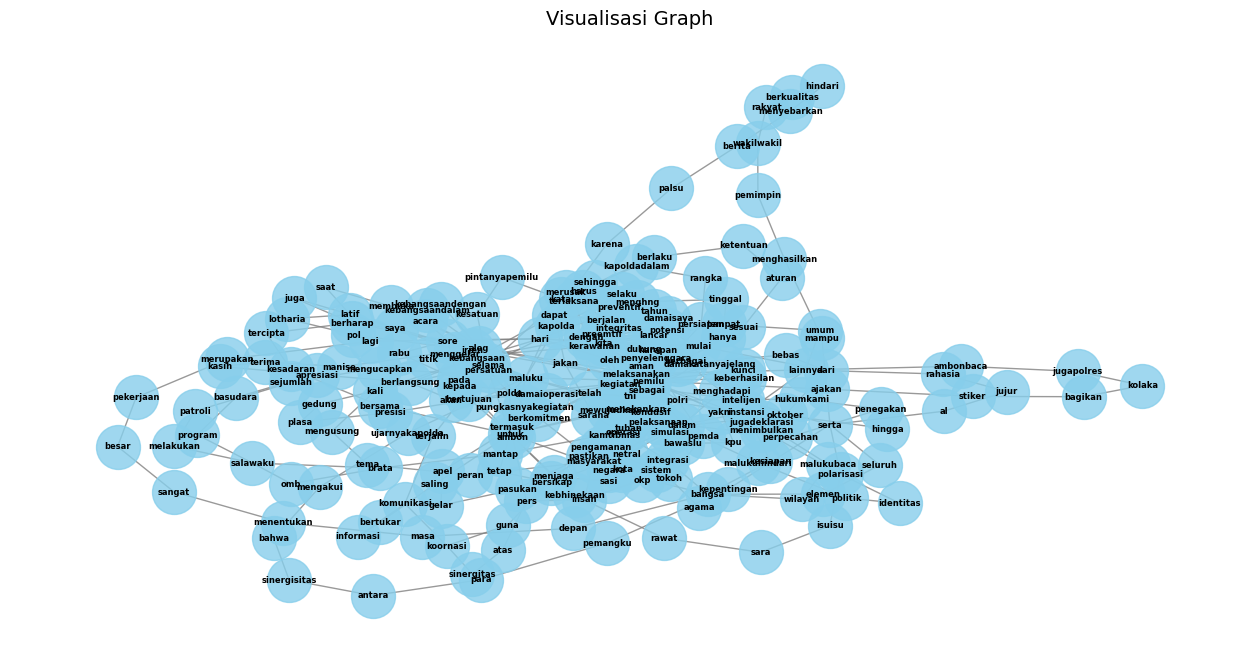

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Visualisasi graph dengan penyesuaian
plt.figure(figsize=(16, 8))

# Penentuan layout graf
pos = nx.spring_layout(G_single_news, seed=42)

# Gambar edges
nx.draw_networkx_edges(G_single_news, pos, alpha=0.8, edge_color="gray")

# Gambar nodes
nx.draw_networkx_nodes(G_single_news, pos, node_size=1000, node_color="skyblue", alpha=0.8)

# Label nodes
nx.draw_networkx_labels(G_single_news, pos, font_size=6, font_color="black", font_weight="bold")

plt.title("Visualisasi Graph", fontsize=14)
plt.axis("off")
plt.show()


## Menghitung centrality node

Algoritma PageRank

Pengertian page rank sendiri yaitu algoritma yang dibuat oleh google yang berguna untuk membantu mesin telusur agar membandingkan halaman yang memenuhi kueri tertentu berdasarkan seberapa sering mereka di referensikan.

Rumus Page Rank

$$PR(A) = (1 - d) + d \left( \frac{PR(B)}{L(B)} + \frac{PR(C)}{L(C)} + \ldots + \frac{PR(N)}{L(N)} \right)
$$


\begin{align*}
    &\bullet \quad PR(A) \text{ adalah PageRank dari halaman } A. \\
    &\bullet \quad d \text{ adalah faktor damping, biasanya diatur menjadi } 0.85. \\
    &\text{Ini mewakili probabilitas bahwa pengguna akan melanjutkan ke halaman lain daripada mengklik tautan.} \\
    &\bullet \quad PR(B), PR(C), \ldots \text{ adalah PageRank dari halaman-halaman yang memiliki tautan ke halaman } A. \\
    &\bullet \quad L(B), L(C), \ldots \text{ adalah jumlah tautan keluar dari masing-masing halaman } B, C, \ldots.
\end{align*}


Dan rumus ini ketika pagerank sudah melakukan iterasi berikutnya
$$PR^{(t+1)}(A) = (1 - d) + d \left( \frac{PR^{(t)}(B)}{L(B)} + \frac{PR^{(t)}(C)}{L(C)} + \ldots + \frac{PR^{(t)}(N)}{L(N)} \right)
$$

Perhitungan otomatis

In [ ]:
# Closeness centrality
closeness_centrality_single_news = nx.closeness_centrality(G_single_news)
closeness_df = pd.DataFrame(list(closeness_centrality_single_news.items()), columns=['token', 'closeness_centrality'])

# Pagerank centrality
pagerank_centrality_single_news = nx.pagerank(G_single_news)
pagerank_df = pd.DataFrame(list(pagerank_centrality_single_news.items()), columns=['token', 'pagerank_centrality'])

# Tampilkan DataFrame
print("DataFrame Closeness Centrality:")
print(closeness_df)

print("\nDataFrame Pagerank Centrality:")
print(pagerank_df)

DataFrame Closeness Centrality:
                  token  closeness_centrality
0                 ambon              0.237102
1                 polda              0.271698
2                maluku              0.294278
3             menggelar              0.245176
4                  alog              0.283837
..                  ...                   ...
212         menimbulkan              0.257449
213          perpecahan              0.232258
214  pungkasnyakegiatan              0.233010
215       penyelenggara              0.257757
216               yakni              0.247423

[217 rows x 2 columns]

DataFrame Pagerank Centrality:
                  token  pagerank_centrality
0                 ambon             0.003700
1                 polda             0.008898
2                maluku             0.018979
3             menggelar             0.002773
4                  alog             0.014662
..                  ...                  ...
212         menimbulkan             0.003043


Perhitungan Manual

In [ ]:
# Baca file Excel
df = pd.read_excel("/content/drive/MyDrive/ppw/PageRank/co_occurance_matrix.xlsx")

# Tampilkan DataFrame
df.head()

,source,target,weight,-,Initial Page rank,Current Page Rank iterasi 1,penerapan,hasil 1,-.1,Iterasi 2,penerapan 2,hasil 2,hasil 3,hasil 4
0,ambon,polda,1,"323 node = 1/323 > 0,00309597523",0.003096,(1-0.85) + 0.85 (pr(polda) / 1),"0,15 + 0,85 (0,00309597523 / 1)",0.152632,NaN,(1-0.85) + 0.85 (pr(polda)/1),"0,15 + 0,85 (0,152631579/1)",0.279737,0.387776,0.479610
1,polda,maluku,4,NaN,0.003096,(1-0.85) + 0.85 (pr(maluku) / 4),"0,15 + 0,85 (0,00309597523 / 4)",0.150658,NaN,(1-0.85) + 0.85 (pr(maluku)/4),"0,15 + 0,85 (0,150657895/4)",0.182015,0.188678,0.190094
2,maluku,menggelar,1,NaN,0.003096,(1-0.85) + 0.85 (pr(menggelar) / 1),"0,15 + 0,85 (0,00309597523 / 1)",0.152632,NaN,(1-0.85) + 0.85 (pr(menggelar)/1),"0,15 + 0,85 (0,152631579/1)",0.279737,0.387776,0.479610
3,menggelar,alog,1,NaN,0.003096,(1-0.85) + 0.85 (pr(alog) / 1),"0,15 + 0,85 (0,00309597523 / 1)",0.152632,NaN,(1-0.85) + 0.85 (pr(alog)/1),"0,15 + 0,85 (0,152631579/1)",0.279737,0.387776,0.479610
4,alog,kebangsaan,9,NaN,0.003096,(1-0.85) + 0.85 (pr(kebangsaan) / 9),"0,15 + 0,85 (0,00309597523 / 9)",0.150292,NaN,(1-0.85) + 0.85 (pr(kebangsaan)/9),"0,15 + 0,85 (0,150292398/9)",0.164194,0.165507,0.165631


## Ranking Node

In [ ]:
# Merangking node kata dari closeness centrality
ranked_by_closeness_single_news = closeness_df.sort_values(by='closeness_centrality', ascending=False)

print("Hasil ranking dari closeness centrality:")
ranked_by_closeness_single_news

Hasil ranking dari closeness centrality:


,token,closeness_centrality
17,pemilu,0.324324
2,maluku,0.294278
4,alog,0.283837
63,dalam,0.280884
16,mewujudkan,0.273764
...,...,...
83,sangat,0.122658
202,wakilwakil,0.119271
205,hindari,0.118486
204,berkualitas,0.110204


In [ ]:
# Merangking node kata dari pagerank centrality
ranked_by_pagerank_single_news = pagerank_df.sort_values(by='pagerank_centrality', ascending=False)

print("Hasil ranking dari page rank:")
ranked_by_pagerank_single_news

Hasil ranking dari page rank:


,token,pagerank_centrality
17,pemilu,0.037457
2,maluku,0.018979
15,untuk,0.016171
4,alog,0.014662
18,damai,0.012316
...,...,...
24,lancar,0.002662
92,katanyajelang,0.002638
120,hingga,0.002088
152,kebangsaandengan,0.001824
